In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from jitcsde import jitcsde, y, t
from IPython.display import HTML
from LS96SDE import *

In [28]:
250/0.005

50000.0

In [3]:
# create model instance
model = L96SDE(K=10, F=8, dt=0.005, sigma=np.sqrt(0.5))

# Run the model for 5000 steps
model.iterate(25000.0)


  0%|          | 0/5000000 [00:00<?, ?it/s]

Generating, compiling, and loading C code.


  0%|          | 1091/5000000 [00:07<6:22:42, 217.70it/s]

Using default integration parameters.


100%|██████████| 5000000/5000000 [08:43<00:00, 9556.89it/s] 
c:\Users\alish\AppData\Local\Programs\Python\Python310\lib\site-packages\jitcxde_common\_jitcxde.py:366: UserWarning: Could not delete temporary directory because of the following error:
[WinError 267] The directory name is invalid: 'C:\\Users\\alish\\AppData\\Local\\Temp\\jitcxde_ko4ogz2t\\jitced.cp310-win_amd64.pyd'
  warn(f"Could not delete temporary directory because of the following error:\n{error}")


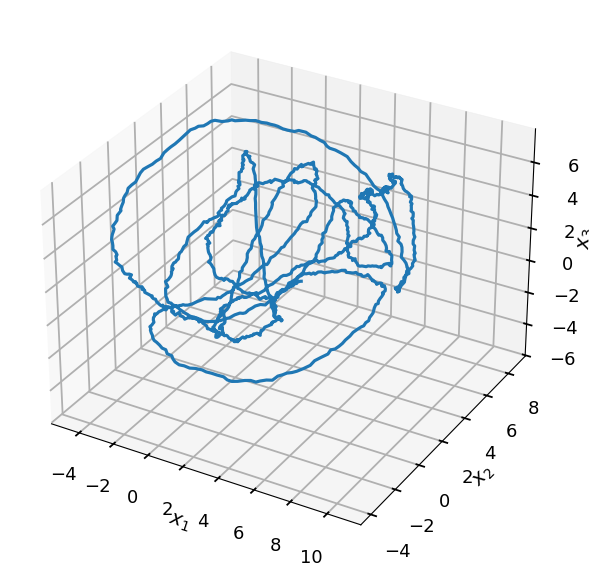

In [4]:
with plt.style.context('seaborn-v0_8-talk'):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot(model._history[500:2000, 0], model._history[500:2000, 1], model._history[500:2000, 3])
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$x_3$")
    # plt.savefig(os.path.join(os.getcwd(), 'timeseries3d.pdf'), bbox_inches='tight')
    # plt.close()

In [5]:
np.save(f'Lorenz96_{model.K}D_noise{model.sigma:.1f}_dt{model.dt}_F{model.F}.npy', np.swapaxes(model._history, 1, 0))

In [ ]:
# Animated plot
# ani = model.animate_plot(total_frames=150)
# HTML(ani.to_jshtml())
   

In [9]:
from statsmodels.tsa.stattools import adfuller

In [4]:
model._history.shape

(1000001, 3)

In [31]:
# adfuller(np.swapaxes(model._history, 1, 0))
adfuller(model._history[:5000,0])
# why is it [:, 0]
# read adfuller
# read second order 
# all these and saturation
# Generally the stationarity problem

(np.float64(-4.400394638028176),
 np.float64(0.00029635563625861116),
 32,
 4967,
 {'1%': np.float64(-3.4316672302646283),
  '5%': np.float64(-2.8621220724882153),
  '10%': np.float64(-2.5670798380375506)},
 np.float64(-15067.276369618783))